# Projeto 1
## Introdução a Data Science
### Alunos
Gabriel de Melo Evangelista (gme@cin.ufpe.br)

Maria Luísa Leandro de Lima (mlll@cin.ufpe.br)
### Tema: Powerlifting
https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html

- Força homem vs mulher

- categorias: raw/singleply se eh igual ou se tem diferença

- ver a diferença de uma pessoa com os anos

- discretizar os pesos usados em exercicios pra dps categorizar usar pra alguma coisa

- se tiver nan, ja da usar a parte acima com o knn fancy la

- o peso que as pessoas conseguem executar o exercicio é menor que o peso que eles falham

- ver se tem impacto ser tested ou n

- ajeitar a idade bugada pra zero
  
- Criar um plot com o peso levantado com melhores dos equipamentos, separando por idade
  
- Criar um plot com as 4 tentativas de levantamento para ver a melhoria das pessoas

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 1. Coleta de dados

In [2]:
df = pd.read_csv('openpowerlifting.csv')

c:\Users\GODZILLA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (33,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [4]:
df.shape

(2744390, 41)

In [5]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

In [6]:
df['Event'].value_counts()

SBD    1886059
B       627304
D       157510
BD       53965
S        14886
SB        2876
SD        1790
Name: Event, dtype: int64

In [7]:
df['Equipment'].value_counts()

Single-ply    1312406
Raw           1127258
Wraps          177562
Multi-ply      119583
Unlimited        7535
Straps             46
Name: Equipment, dtype: int64

In [8]:
df[~df['Place'].str.isnumeric()]['Place'].value_counts()

DQ    173956
NS     14671
G       7461
DD      1506
Name: Place, dtype: int64

In [9]:
df = df[(df['Place'].str.isnumeric()) & (df['Event']=='SBD') & (df['Equipment'].isin(['Single-ply', 'Raw']))]

In [10]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


### 2. Pré-processamento dos dados

In [11]:
df.dtypes

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [12]:
df['Sex'] = df['Sex'].astype('category')
df['Equipment'] = df['Equipment'].astype('category')
df['Division'] = df['Division'].astype('category')
df['WeightClassKg'] = df['WeightClassKg'].astype('category')
df['Place'] = df['Place'].astype('category')

In [13]:
df['Sex'] = df['Sex'].cat.codes
df['EquipmentC'] = df['Equipment'].cat.codes
df['DivisionC'] = df['Division'].cat.codes
df['WeightClassKgC'] = df['WeightClassKg'].cat.codes
df['PlaceC'] = df['Place'].cat.codes

In [14]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC
0,Alona Vladi,0,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,138,0
1,Galina Solovyanova,0,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1196,189,0
2,Daniil Voronin,1,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,2171,189,0
3,Aleksey Krasov,1,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0
4,Margarita Pleschenkova,1,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0


In [15]:
df.isna().sum(axis=0)

Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                  726249
AgeClass             551205
BirthYearClass       681413
Division               1173
BodyweightKg          11885
WeightClassKg          8586
Squat1Kg             989817
Squat2Kg             994541
Squat3Kg            1007495
Squat4Kg            1519175
Best3SquatKg           9331
Bench1Kg             989986
Bench2Kg             993814
Bench3Kg            1007523
Bench4Kg            1519683
Best3BenchKg           9315
Deadlift1Kg          989600
Deadlift2Kg          996298
Deadlift3Kg         1015185
Deadlift4Kg         1516988
Best3DeadliftKg        9277
TotalKg                   0
Place                     0
Dots                  11885
Wilks                 11885
Glossbrenner          11885
Goodlift              12790
Tested               244023
Country              799232
State               1213230
Federation                0
ParentFederation    

In [16]:
dfnaclean = df.dropna(thresh=0.7*len(df), axis=1)
dfnaclean['Age'] = df['Age']

<ipython-input-16-f8eb11064e68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean['Age'] = df['Age']


In [17]:
dfnaclean.isnull().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Division             1173
BodyweightKg        11885
WeightClassKg        8586
Best3SquatKg         9331
Best3BenchKg         9315
Best3DeadliftKg      9277
TotalKg                 0
Place                   0
Dots                11885
Wilks               11885
Glossbrenner        11885
Goodlift            12790
Tested             244023
Federation              0
Date                    0
MeetCountry             0
MeetState          321016
MeetTown           195186
MeetName                0
EquipmentC              0
DivisionC               0
WeightClassKgC          0
PlaceC                  0
Age                726249
dtype: int64

In [18]:
dfnaclean.head()

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,Date,MeetCountry,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,Age
0,Alona Vladi,0,SBD,Raw,O,58.30,60,80.0,60.0,107.5,...,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,138,0,33.0
1,Galina Solovyanova,0,SBD,Raw,M1,73.10,75,105.0,67.5,110.0,...,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1196,189,0,43.0
2,Daniil Voronin,1,SBD,Raw,T,67.40,75,100.0,62.5,105.0,...,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,2171,189,0,15.5
3,Aleksey Krasov,1,SBD,Raw,O,66.65,75,137.5,122.5,170.0,...,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0,35.0
4,Margarita Pleschenkova,1,SBD,Raw,O,72.45,75,90.0,50.0,125.0,...,2019-05-11,Russia,NaN,Bryansk,Open Tournament,0,1865,189,0,26.5


In [19]:
dfnaclean[dfnaclean.duplicated()]

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,Date,MeetCountry,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,Age
4340,Alexis Carvalho,1,SBD,Raw,Open,81.80,82.5,220.00,157.50,250.00,...,2018-05-05,Portugal,NaN,NaN,Campeonato Nacional de Powerlifting,0,1868,216,0,22.0
81611,Kevin Gingerich,1,SBD,Raw,Open,71.94,75,154.22,115.67,183.70,...,2016-10-29,USA,NC,Charlotte,Junior & Senior National Powerlifting Champion...,0,1868,189,32,32.0
92867,Mitch Booyse,1,SBD,Raw,Juniors,53.00,53,97.50,60.00,112.50,...,2015-08-29,South Africa,NaN,Johannesburg,Gauteng Raw Powerlifting Championships,0,871,113,0,15.5
107583,Henrik Vestergaard,1,SBD,Single-ply,Open,67.50,67.5,190.00,122.50,207.50,...,1998-01-01,Denmark,NaN,Thisted,DM A,1,1868,162,0,33.5
113729,Kim Andersen,1,SBD,Single-ply,Open,100.00,100,280.00,180.00,300.00,...,1996-11-30,Denmark,NaN,Horsens,DM A,1,1868,2,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657503,Denzell Perry,1,SBD,Single-ply,Boys,94.17,99.7,156.49,115.67,165.56,...,2011-01-14,USA,TX,Anna,Anna High School Meet,1,156,276,98,NaN
2657508,Victor Martinez,1,SBD,Single-ply,Boys,95.25,99.7,115.67,92.99,156.49,...,2011-01-14,USA,TX,Anna,Anna High School Meet,1,156,276,23,NaN
2657532,Quinton Carroll,1,SBD,Single-ply,Boys,113.49,124.7,179.17,88.45,174.63,...,2011-01-14,USA,TX,Anna,Anna High School Meet,1,156,50,65,NaN
2657534,Dario Richardson,1,SBD,Single-ply,Boys,120.47,124.7,106.59,79.38,129.27,...,2011-01-14,USA,TX,Anna,Anna High School Meet,1,156,50,76,NaN


In [20]:
dfnaclean.drop_duplicates(inplace=True)

<ipython-input-20-ad91f84a674d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean.drop_duplicates(inplace=True)


In [21]:
dfnaclean[dfnaclean.duplicated()]

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,Date,MeetCountry,MeetState,MeetTown,MeetName,EquipmentC,DivisionC,WeightClassKgC,PlaceC,Age


In [22]:
dfnaclean = dfnaclean.drop(['MeetState','MeetTown'], axis=1)

In [23]:
dfnaclean.shape

(1521581, 26)

#### 2.1 Inserindo dados ausentes em mais de uma coluna

In [24]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'Tested', 'Federation', 'Date', 'MeetCountry', 'MeetName', 'EquipmentC',
       'DivisionC', 'WeightClassKgC', 'PlaceC', 'Age'],
      dtype='object')

In [25]:
incomplete_mask = ['Sex', 'EquipmentC', 'DivisionC', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'PlaceC', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

In [108]:
df_complete = dfnaclean[incomplete_mask].dropna().sample(10000).reset_index(drop=True)
df_incomplete = df_complete.copy()

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
for x in incomplete_mask[3:]:
    df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-109-b96bc860c0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN
<ipython-input-109-b96bc860c0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete[x][df_incomplete.sample(100

In [110]:
df_incomplete.isna().sum()

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sex                   0
EquipmentC            0
DivisionC             0
BodyweightKg       1000
Best3SquatKg       1000
Best3BenchKg       1000
Best3DeadliftKg    1000
TotalKg            1000
PlaceC             1000
Dots               1000
Wilks              1000
Glossbrenner       1000
Goodlift           1000
dtype: int64

In [111]:
df_incomplete.sample(10)

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
2838,1,0,1337,89.98,182.50,145.00,227.50,555.00,1.0,358.90,354.35,339.61,73.79
9731,1,1,1868,NaN,215.46,156.49,263.08,635.03,0.0,410.61,405.40,388.54,70.07
3999,1,1,858,106.70,NaN,100.00,155.00,395.00,NaN,236.70,234.74,224.19,40.08
5114,1,1,1850,52.00,100.00,47.50,130.00,NaN,32.0,265.79,272.30,268.17,NaN
3825,1,0,2102,62.84,150.00,105.00,175.00,430.00,76.0,349.74,351.93,342.81,NaN
695,1,1,156,NaN,102.06,65.77,120.20,288.03,NaN,273.69,280.16,275.77,NaN
3005,0,1,751,55.97,127.01,63.50,113.40,303.91,65.0,352.39,357.73,316.43,58.93
6881,0,0,446,83.20,115.00,65.00,122.50,302.50,NaN,279.62,271.06,237.13,57.34
7796,1,0,1868,98.90,195.00,135.00,230.00,560.00,1.0,346.36,342.34,327.04,NaN
8875,1,1,1868,110.00,308.44,170.10,337.93,816.47,43.0,483.57,480.49,459.23,81.75


In [117]:
import fancyimpute as fi
df_SimpleFill = pd.DataFrame(data=fi.SimpleFill().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
sf_mse = ((df_SimpleFill - df_complete) ** 2).mean()

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
df_KNN = pd.DataFrame(data=fi.KNN(k=5).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
knn_mse = ((df_KNN - df_complete) ** 2).mean()

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Imputing row 1/10000 with 0 missing, elapsed time: 15.221
Imputing row 101/10000 with 2 missing, elapsed time: 15.227
Imputing row 201/10000 with 2 missing, elapsed time: 15.233
Imputing row 301/10000 with 4 missing, elapsed time: 15.239
Imputing row 401/10000 with 2 missing, elapsed time: 15.244
Imputing row 501/10000 with 3 missing, elapsed time: 15.251
Imputing row 601/10000 with 2 missing, elapsed time: 15.257
Imputing row 701/10000 with 0 missing, elapsed time: 15.263
Imputing row 801/10000 with 2 missing, elapsed time: 15.270
Imputing row 901/10000 with 0 missing, elapsed time: 15.276
Imputing row 1001/10000 with 1 missing, elapsed time: 15.281
Imputing row 1101/10000 with 0 missing, elapsed time: 15.287
Imputing row 1201/10000 with 2 missing, elapsed time: 15.294
Imputing row 1301/10000 with 2 missing, elapsed time: 15.299
Imputing row 1401/10000 with 2 missing, elapsed time: 15.305
Imputing row 1501/10000 with 3 missing, elapsed time: 15.311
Imputing row 1601/10000 with 2 missi

In [114]:
df_SoftImpute = pd.DataFrame(data=fi.SoftImpute().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
si_mse = ((df_SoftImpute - df_complete) ** 2).mean()

[SoftImpute] Max Singular Value of X_init = 150072.030290
[SoftImpute] Iter 1: observed MAE=15.439831 rank=10
[SoftImpute] Iter 2: observed MAE=15.673686 rank=8
[SoftImpute] Iter 3: observed MAE=15.714748 rank=7
[SoftImpute] Iter 4: observed MAE=15.656860 rank=7
[SoftImpute] Iter 5: observed MAE=15.593733 rank=6
[SoftImpute] Iter 6: observed MAE=14.912761 rank=4
[SoftImpute] Iter 7: observed MAE=14.502738 rank=4
[SoftImpute] Iter 8: observed MAE=14.290427 rank=4
[SoftImpute] Iter 9: observed MAE=14.175036 rank=4
[SoftImpute] Iter 10: observed MAE=14.110832 rank=4
[SoftImpute] Iter 11: observed MAE=14.074336 rank=4
[SoftImpute] Iter 12: observed MAE=14.053080 rank=4
[SoftImpute] Iter 13: observed MAE=14.040387 rank=4
[SoftImpute] Iter 14: observed MAE=14.032593 rank=4
[SoftImpute] Iter 15: observed MAE=14.027781 rank=4
[SoftImpute] Iter 16: observed MAE=14.024750 rank=4
[SoftImpute] Iter 17: observed MAE=14.022826 rank=4
[SoftImpute] Stopped after iteration 17 for lambda=3001.440606


c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
df_IterativeImputer = pd.DataFrame(data=fi.IterativeImputer(max_iter=100).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
ii_mse = ((df_IterativeImputer - df_complete) ** 2).mean()

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
pd.DataFrame({'SimpleFill': sf_mse, 'KNN': knn_mse, 'IterativeImputer': ii_mse, 'SoftImpute': sf_mse})

c:\Users\GODZILLA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SimpleFill,KNN,IterativeImputer,SoftImpute
Sex,0.000000,0.000000,0.000000,0.000000
EquipmentC,0.000000,0.000000,0.000000,0.000000
DivisionC,0.000000,0.000000,0.000000,0.000000
BodyweightKg,50.953337,7.889662,5.258217,50.953337
Best3SquatKg,411.032393,29.066212,9.130824,411.032393
Best3BenchKg,214.755603,24.687966,9.361121,214.755603
Best3DeadliftKg,349.300859,24.475520,10.463223,349.300859
TotalKg,2639.328524,43.542116,19.159244,2639.328524
PlaceC,98.827393,107.857240,93.269415,98.827393
Dots,649.848897,12.954105,1.200505,649.848897


In [97]:
df_incomplete.describe()

,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
count,10000.000000,10000.00000,10000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.725000,0.61730,1149.119800,81.718722,170.134168,107.717318,184.842804,463.421347,33.419333,343.269770,341.327517,322.042299,62.582356
std,0.446537,0.48607,728.955718,22.148409,63.625666,46.863437,59.468509,164.660755,31.297886,79.374768,78.605383,77.485967,15.183913
min,0.000000,0.00000,-1.000000,35.000000,24.950000,20.000000,25.000000,90.000000,0.000000,114.050000,112.870000,81.700000,15.450000
25%,0.000000,0.00000,439.000000,65.487500,120.000000,70.000000,137.500000,331.120000,0.000000,287.140000,285.547500,266.410000,51.147500
50%,1.000000,1.00000,1145.000000,80.000000,165.000000,105.000000,182.500000,455.860000,32.000000,339.910000,337.595000,319.695000,62.285000
75%,1.000000,1.00000,1868.000000,95.530000,210.920000,138.350000,227.500000,580.000000,54.000000,394.690000,392.060000,372.395000,73.340000
max,1.000000,1.00000,2422.000000,207.000000,455.000000,365.000000,402.500000,1165.000000,109.000000,661.020000,652.650000,640.780000,134.040000


<AxesSubplot:>

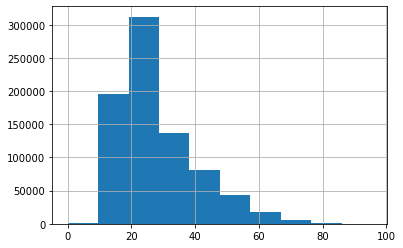

In [72]:
dfnaclean['Age'].hist()

In [ ]:
## categorizando o genero
samples['Sex'] = samples["Sex"].astype('category')
samples['Equipment'] = samples["Equipment"].astype('category')
samples['Sex'] = samples['Sex'].cat.codes

In [ ]:
samples.head()

,Name,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,0,Raw,33.0,24-34,24-39,O,58.30,60,75.0,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,0,Raw,43.0,40-44,40-49,M1,73.10,75,95.0,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,1,Raw,15.5,16-17,14-18,T,67.40,75,85.0,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,1,Raw,35.0,35-39,24-39,O,66.65,75,125.0,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,1,Raw,26.5,24-34,24-39,O,72.45,75,80.0,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [ ]:
samples['Age'].describe()

count    850830.000000
mean         28.135626
std          12.067098
min           0.000000
25%          19.500000
50%          24.500000
75%          34.000000
max          95.500000
Name: Age, dtype: float64

In [ ]:
samples['Division'].value_counts()

Open            459887
Boys            362200
Girls           156454
Juniors          67711
MR-O             49425
                 ...  
M-MPFF-R-U           1
FM1RE-AD             1
M!                   1
M_MCR_8_ABPU         1
F_MES_7_AAPF         1
Name: Division, Length: 2470, dtype: int64

In [ ]:
samples['Sex'].value_counts()

1    1205056
0     454155
2         18
Name: Sex, dtype: int64

### Análise Homem x Mulher

In [ ]:
dfMan = samples[samples['Sex'] == 1].copy()
dfWoman = samples[samples['Sex'] == 0].copy()

<AxesSubplot:>

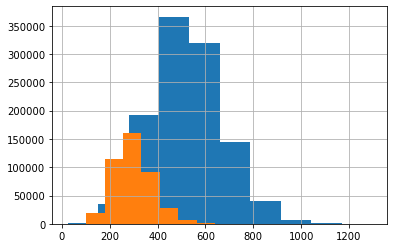

In [ ]:
dfMan['TotalKg'].hist()
dfWoman['TotalKg'].hist()

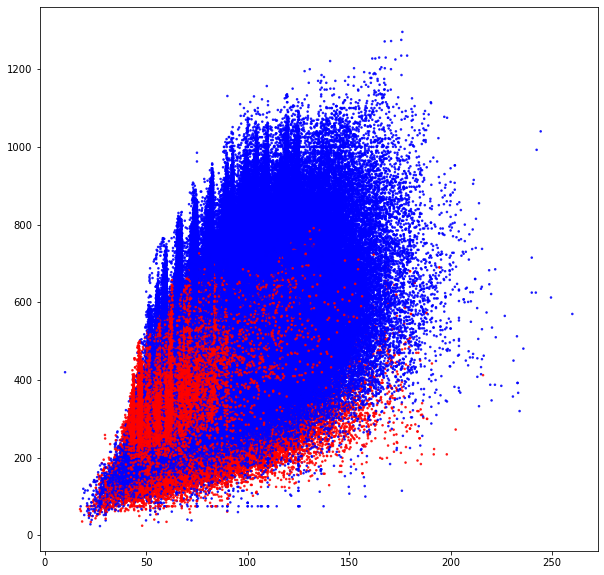

In [ ]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(samples['BodyweightKg'], samples['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in samples['Sex']])

In [ ]:
dfMan['TotalKg'].dropna()

2           267.5
3           430.0
4           265.0
5           275.0
6           335.0
            ...  
2744287    1037.5
2744288     985.0
2744289     980.0
2744290     955.0
2744291     942.5
Name: TotalKg, Length: 1106150, dtype: float64

In [ ]:
dfWoman['TotalKg'].dropna()

0          247.5
1          282.5
7          287.5
70         222.5
3993       230.0
           ...  
2744384    647.5
2744385    645.0
2744386    632.5
2744387    617.5
2744388    515.0
Name: TotalKg, Length: 421913, dtype: float64

In [ ]:
## peso total por idade, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(samples['Age'], samples['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in samples['Sex']])

In [ ]:
stats.ttest_ind(dfWoman['TotalKg'].dropna(), dfMan['TotalKg'].dropna())

Ttest_indResult(statistic=-968.00695113989, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(dfWoman['TotalKg'].dropna(), dfMan['TotalKg'].dropna())

MannwhitneyuResult(statistic=37707539471.5, pvalue=0.0)

### Hipótese2

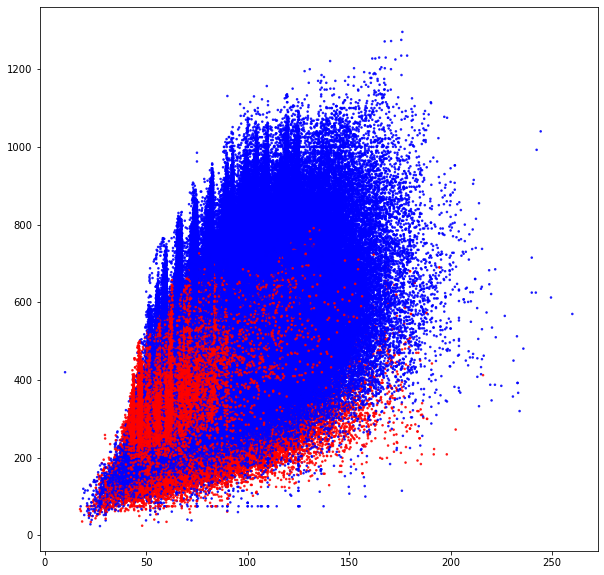

In [ ]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(samples['BodyweightKg'], samples['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in samples['Sex']])

In [ ]:
samples['WeightClassKg'].value_counts()[0:10]

90      22206
75      20779
100     20387
82.5    19597
67.5    14612
110     14553
125     10432
93       9053
83       8807
60       8074
Name: WeightClassKg, dtype: int64

In [ ]:
samples['BodyweightKg'].describe()

count    270617.00000
mean         84.00027
std          22.70205
min          10.00000
25%          67.04000
50%          81.90000
75%          98.80000
max         242.50000
Name: BodyweightKg, dtype: float64

In [ ]:
samples['Name'].value_counts()

Jackie Blasbery       156
Jenny Hunter          151
Kevin Jane            139
Karel Ruso            136
Max Bristow           125
                     ... 
Simon Hogsten           1
Anatoliy Avramenko      1
Amrit-Sadhana Boyd      1
B. Trail                1
Janis Gilbreth          1
Name: Name, Length: 503975, dtype: int64

### Hipótese 3

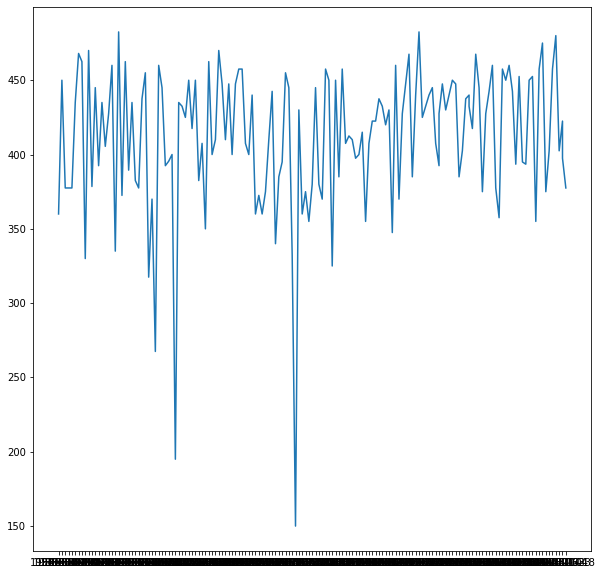

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(samples[(samples["Name"] == 'Jackie Blasbery')]['Date'].sort_values(),samples[(samples["Name"] == 'Jackie Blasbery')]['TotalKg'])

In [ ]:
samples['Equipment'].value_counts()

Single-ply    131119
Raw           112757
Wraps          17945
Multi-ply      11713
Unlimited        704
Straps             7
Name: Equipment, dtype: int64

<AxesSubplot:>

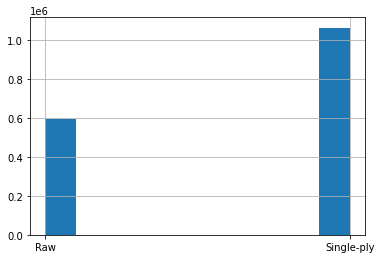

In [ ]:
samples['Equipment'].hist()

### Hipótese 4

In [ ]:
squat1 = samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat1Kg'] >= 0)]['Squat1Kg']
squat2 = samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat2Kg'] >= 0)]['Squat2Kg']
squat3 = samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat3Kg'] >= 0)]['Squat3Kg']
squat4 = samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat4Kg'] >= 0)]['Squat4Kg']

squat1_raw = samples[(samples['Equipment'] == 'Raw') & (samples['Squat1Kg'] >= 0)]['Squat1Kg']
squat2_raw = samples[(samples['Equipment'] == 'Raw') & (samples['Squat2Kg'] >= 0)]['Squat2Kg']
squat3_raw = samples[(samples['Equipment'] == 'Raw') & (samples['Squat3Kg'] >= 0)]['Squat3Kg']
squat4_raw = samples[(samples['Equipment'] == 'Raw') & (samples['Squat4Kg'] >= 0)]['Squat4Kg']

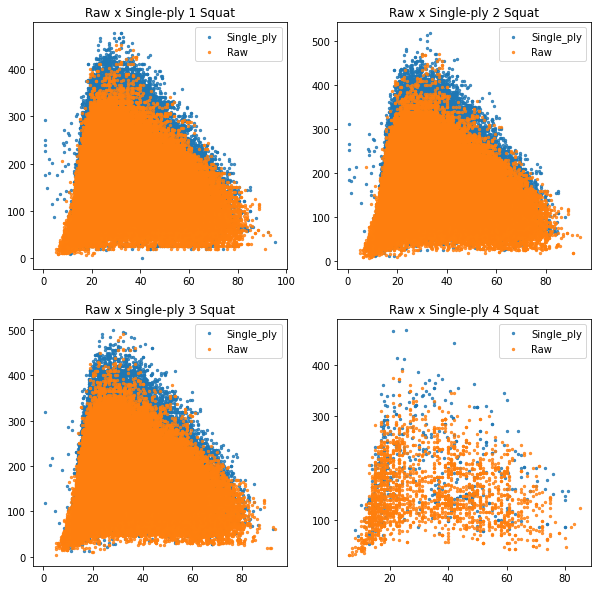

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
axs[0,0].scatter(samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat1Kg'] >= 0)]['Age'], squat1, label = 'Single_ply', alpha=0.8, s=5.5)
axs[0,0].scatter(samples[(samples['Equipment'] == 'Raw') & (samples['Squat1Kg'] >= 0)]['Age'], squat1_raw, label = 'Raw', alpha=0.8, s=5.5)
axs[0,0].set_title('Raw x Single-ply 1 Squat')
axs[0,0].legend()

axs[0,1].scatter(samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat2Kg'] >= 0)]['Age'], squat2, label = 'Single_ply', alpha=0.8, s=5.5)
axs[0,1].scatter(samples[(samples['Equipment'] == 'Raw') & (samples['Squat2Kg'] >= 0)]['Age'], squat2_raw, label = 'Raw', alpha=0.8, s=5.5)
axs[0,1].set_title('Raw x Single-ply 2 Squat')
axs[0,1].legend()

axs[1,0].scatter(samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat3Kg'] >= 0)]['Age'], squat3, label = 'Single_ply', alpha=0.8, s=5.5)
axs[1,0].scatter(samples[(samples['Equipment'] == 'Raw') & (samples['Squat3Kg'] >= 0)]['Age'], squat3_raw, label = 'Raw', alpha=0.8, s=5.5)
axs[1,0].set_title('Raw x Single-ply 3 Squat')
axs[1,0].legend()

axs[1,1].scatter(samples[(samples['Equipment'] == 'Single-ply') & (samples['Squat4Kg'] >= 0)]['Age'], squat4, label = 'Single_ply', alpha=0.8, s=5.5)
axs[1,1].scatter(samples[(samples['Equipment'] == 'Raw') & (samples['Squat4Kg'] >= 0)]['Age'], squat4_raw, label = 'Raw', alpha=0.8, s=5.5)
axs[1,1].set_title('Raw x Single-ply 4 Squat')

axs[1,1].legend()
plt.show()

### Raw vs Single-ply

In [ ]:
dfRaw = samples[samples['Equipment'] == 'Raw'].copy()
dfSingleply = samples[samples['Equipment'] == 'Single-ply'].copy()

<AxesSubplot:>

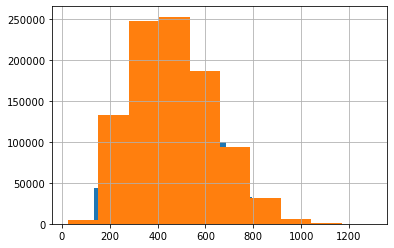

In [ ]:
dfRaw['TotalKg'].hist()
dfSingleply['TotalKg'].hist()

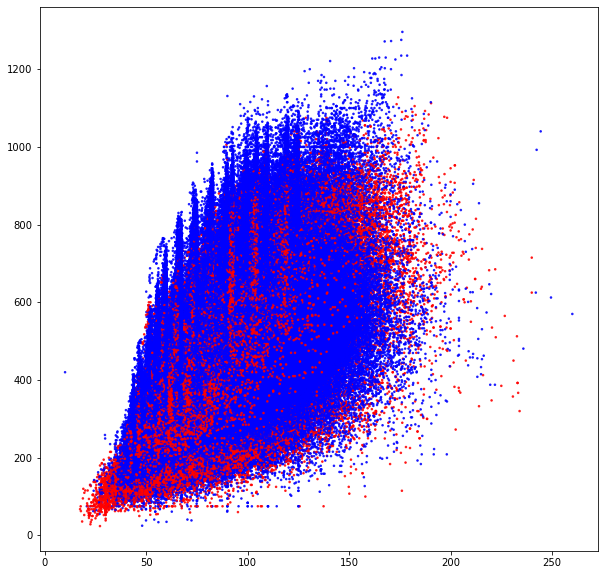

In [ ]:
## peso total por peso corporal, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(samples['BodyweightKg'], samples['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 'Raw' else 'b' for x in samples['Equipment']])

In [ ]:
dfRaw['TotalKg'].dropna()

0          247.5
1          282.5
2          267.5
3          430.0
4          265.0
           ...  
2741388    265.0
2741389    222.5
2741390    197.5
2742284    492.5
2743559    592.5
Name: TotalKg, Length: 570863, dtype: float64

In [ ]:
dfSingleply['TotalKg'].dropna()

3898       625.0
3899       640.0
3900       755.0
3902       680.0
3904       710.0
           ...  
2744384    647.5
2744385    645.0
2744386    632.5
2744387    617.5
2744388    515.0
Name: TotalKg, Length: 957218, dtype: float64

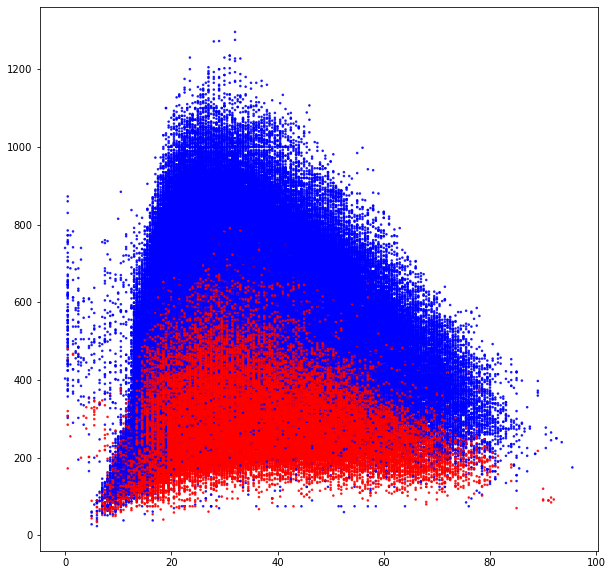

In [ ]:
## peso total por idade, separado por genero
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(samples['Age'], samples['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in samples['Sex']])

In [ ]:
stats.ttest_ind(dfRaw['TotalKg'].dropna(), dfSingleply['TotalKg'].dropna())

Ttest_indResult(statistic=-28.57053667953818, pvalue=1.741589645719509e-179)

In [ ]:
stats.mannwhitneyu(dfRaw['TotalKg'].dropna(), dfSingleply['TotalKg'].dropna())

MannwhitneyuResult(statistic=270532533972.5, pvalue=1.1139535907169308e-24)